## First Version

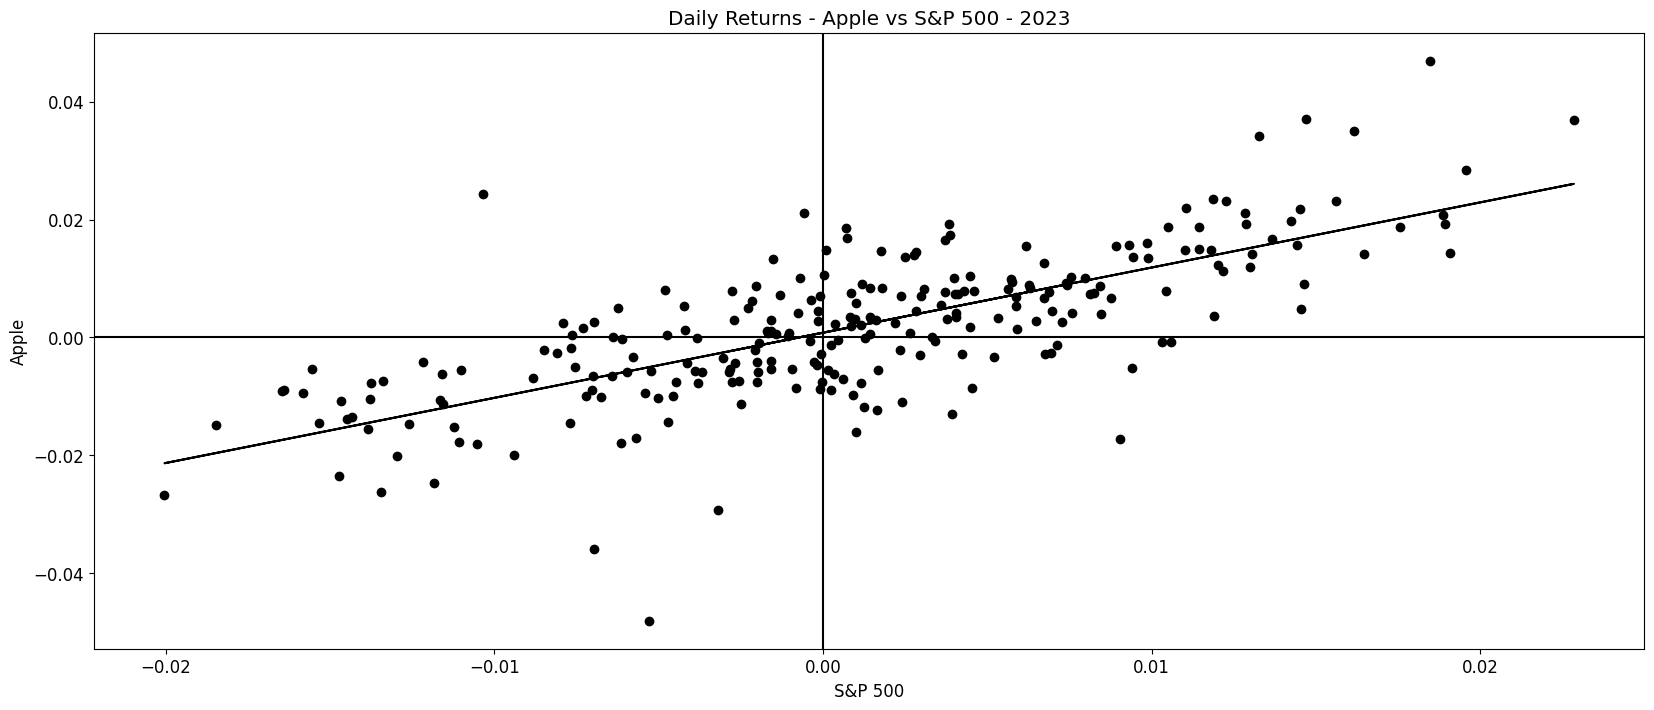

In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.linear_model import LinearRegression
import numpy as np

# Download stock data for Apple and S&P 500 for 2023
apple_stock = yf.download('AAPL', start='2023-01-01', end='2023-12-31', progress= False)
sp500_stock = yf.download('^GSPC', start='2023-01-01', end='2023-12-31', progress=  False)

# Calculate daily returns
apple_returns = apple_stock['Adj Close'].pct_change().dropna()
sp500_returns = sp500_stock['Adj Close'].pct_change().dropna()

# Align the indices of both series
aligned_returns = pd.concat([apple_returns, sp500_returns], axis=1, join='inner')
aligned_returns.columns = ['Apple', 'S&P 500']

# Scatter plot
plt.figure(figsize=(20, 8))
plt.scatter(aligned_returns['S&P 500'], aligned_returns['Apple'], alpha=1,color="black")

# Linear regression
X = aligned_returns['S&P 500'].values.reshape(-1, 1)
y = aligned_returns['Apple'].values
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

# Add regression line to the plot
plt.plot(aligned_returns['S&P 500'], y_pred, color='black')

# Add lines at x=0 and y=0
plt.axhline(y=0, color='black')
plt.axvline(x=0, color='black')

plt.title('Daily Returns - Apple vs S&P 500 - 2023')
plt.xlabel('S&P 500')
plt.ylabel('Apple')
plt.show()

## Modifications

- Increase the font size for the x and y ticks
- Increase the font size for the title
- Square form of the plot with the same x and y limit
- Change the colour of the markers
- Change the colour of the regression line
- Cange the text in the title to use “:”


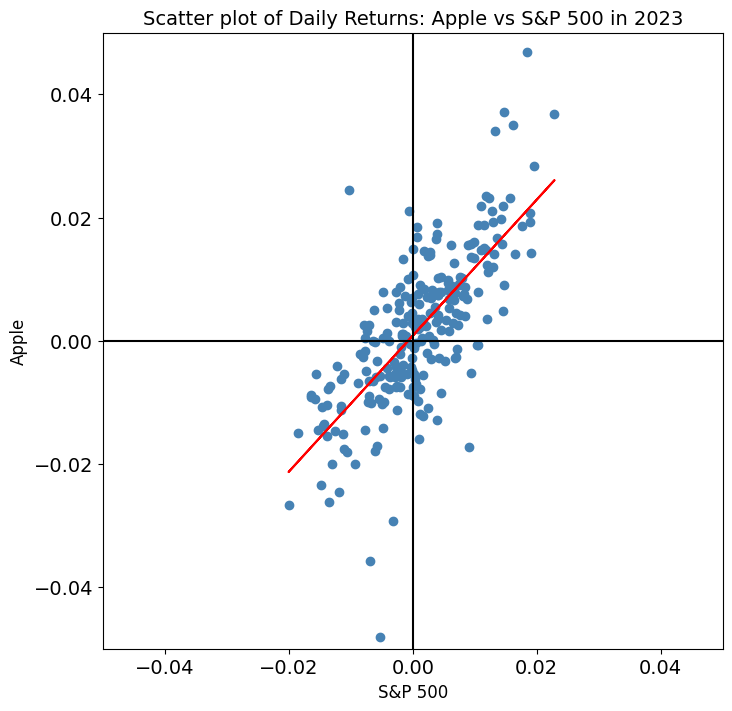

In [7]:
# Scatter plot
plt.figure(figsize=(8, 8))  # Changed to a square figure
plt.scatter(aligned_returns['S&P 500'], aligned_returns['Apple'], alpha=1, color='steelblue')  # Color of markers changed

# Linear regression
X = aligned_returns['S&P 500'].values.reshape(-1, 1)
y = aligned_returns['Apple'].values
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

# Add regression line to the plot
plt.plot(aligned_returns['S&P 500'], y_pred, color='red')  # Color of regression line changed

# Add lines at x=0 and y=0
plt.axhline(y=0, color='black')
plt.axvline(x=0, color='black')

plt.xlim((-0.05,0.05))
plt.ylim((-0.05,0.05))

# Increase font size for the x and y ticks and title
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Scatter plot of Daily Returns: Apple vs S&P 500 in 2023', fontsize=14)

plt.xlabel('S&P 500', fontsize=12)
plt.ylabel('Apple', fontsize=12)
plt.show()


## Modifications

- Reduce the linewidth of the x=0 and y = 0 lines
- Add to the bottom right the equation for the linear regression line and add the correlation coefficient
- Add a pan to the titl
- Rotate the x ticks and add a tick every 0.01 



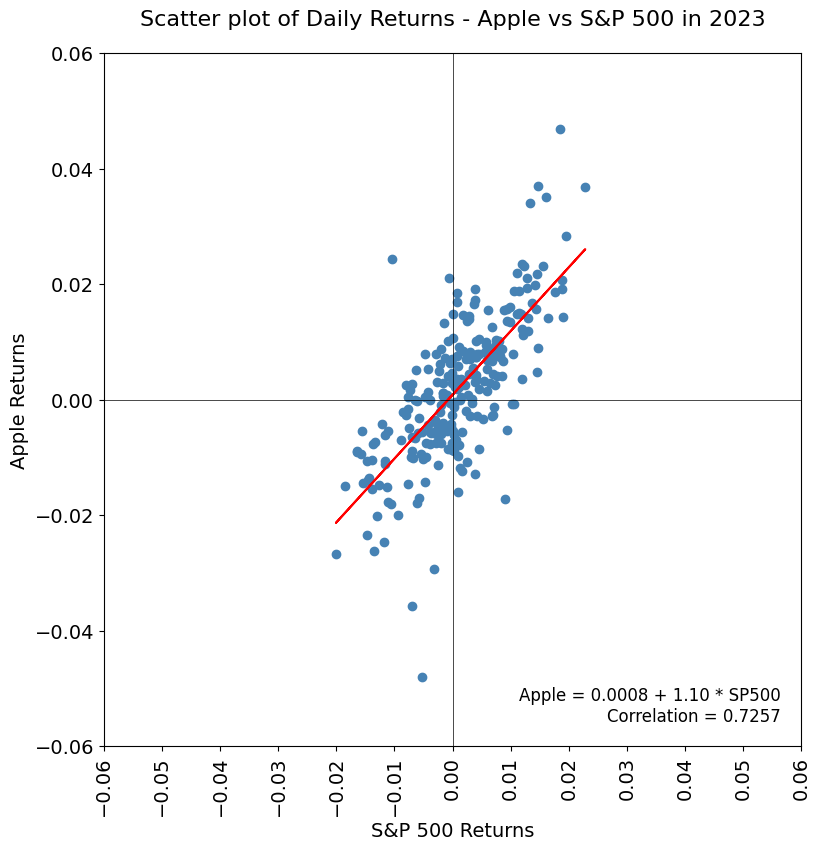

In [8]:
# Scatter plot
plt.figure(figsize=(9, 9))  # Changed to a square figure
plt.scatter(aligned_returns['S&P 500'], aligned_returns['Apple'], alpha=1, color='steelblue')  # Color of markers changed

# Linear regression
X = aligned_returns['S&P 500'].values.reshape(-1, 1)
y = aligned_returns['Apple'].values
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
slope = model.coef_[0]
intercept = model.intercept_

# Add regression line to the plot
plt.plot(aligned_returns['S&P 500'], y_pred, color='red')  # Color of regression line changed

# Add lines at x=0 and y=0
plt.axhline(y=0, color='black', linewidth=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)

plt.xlim((-0.06,0.06))
plt.ylim((-0.06,0.06))

# Increase font size for the x and y ticks and title
plt.xticks(fontsize=14, rotation=90)  # Rotate the x ticks
plt.yticks(fontsize=14)
plt.title('Scatter plot of Daily Returns - Apple vs S&P 500 in 2023', fontsize=16, pad=20)

plt.xlabel('S&P 500 Returns', fontsize=14)
plt.ylabel('Apple Returns', fontsize=14)

# Calculate the correlation coefficient
correlation = aligned_returns['Apple'].corr(aligned_returns['S&P 500'])

# Add the equation of the regression line
equation_text = f'Apple = {intercept:.4f} + {slope:.2f} * SP500\n'
equation_text += f'Correlation = {correlation:.4f}'

plt.text(0.97, 0.03, equation_text, fontsize=12, verticalalignment='bottom', horizontalalignment='right', transform=plt.gca().transAxes)

# Set x ticks every 0.01
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MultipleLocator(0.01))

plt.show()

## Final Version

- Add a pan to the x label
- Use a level of alpha of 0.9 for the scatter plot
- Increase the line width of the regression line and add -- after the lowest and highest return of the S&P 500 index for extrapolation
- Convert the x and y tick to percentages since we do not have decimal numbers
- Force the y ticks to show all the percentages
- Use sans-serif as font style
- x label = S&P 500 and y label = S&P 500
-  S&P 500 also in the equation line
- Increase the size of the figure
- Remove the  top and right spines

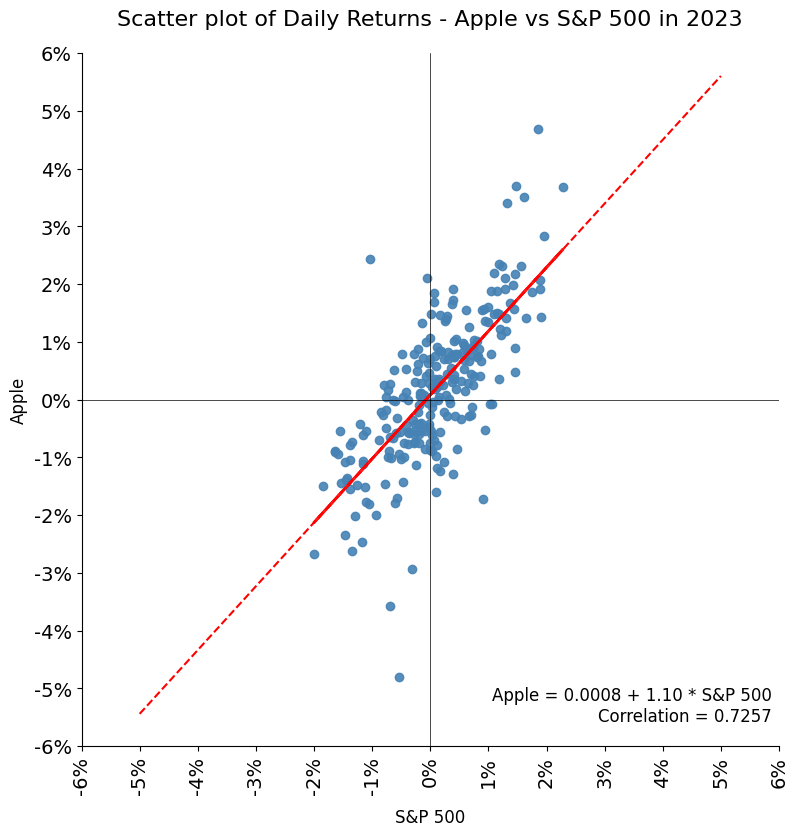

In [11]:
# Set the font
font = 'sans-serif'  
rcParams['font.family'] = font
rcParams['font.size'] = 12

# Scatter plot
plt.figure(figsize=(9, 9))  # Changed to a square figure
plt.scatter(aligned_returns['S&P 500'], aligned_returns['Apple'], alpha=0.9, color='steelblue')  # Adjusted alpha level

# Linear regression
X = aligned_returns['S&P 500'].values.reshape(-1, 1)
y = aligned_returns['Apple'].values
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
slope = model.coef_[0]
intercept = model.intercept_

# Add regression line to the plot with increased width and dashed extrapolation
plt.plot(aligned_returns['S&P 500'], y_pred, color='red', linewidth=2, alpha = 0.9) # Increased line width and dashed

# New x-values for the specified range for plotting the regression line
specific_range = np.linspace(-0.05, 0.05, 500)  # Generates 500 points between -0.05 and 0.05
y_pred_specific = model.predict(specific_range.reshape(-1, 1))

# Add regression line to the plot with increased width and dashed extrapolation
# The regression line will now be plotted only within the specific range
plt.plot(specific_range, y_pred_specific, color='red', linewidth=1.5, linestyle='--')  # Increased line width and dashed

# Add lines at x=0 and y=0
plt.axhline(y=0, color='black', linewidth=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)

plt.xlim((-0.06,0.06))
plt.ylim((-0.06,0.06))

# Increase font size for the x and y ticks and title
plt.xticks(fontsize=14, rotation=90)  # Rotate the x ticks
plt.yticks(fontsize=14)
plt.title('Scatter plot of Daily Returns - Apple vs S&P 500 in 2023', fontsize=16, pad=20)

# X and Y labels with added padding for the x label
plt.xlabel('S&P 500', labelpad=10)
plt.ylabel('Apple')

# Calculate the correlation coefficient
correlation = aligned_returns['Apple'].corr(aligned_returns['S&P 500'])

# Add the equation of the regression line
equation_text = f'Apple = {intercept:.4f} + {slope:.2f} * S&P 500\n'
equation_text += f'Correlation = {correlation:.4f}'

plt.text(0.99, 0.03, equation_text, fontsize=12, verticalalignment='bottom', horizontalalignment='right', transform=plt.gca().transAxes)

# Set x and y ticks format to percent and define custom tick locations
ax = plt.gca()

# Assuming the data range is known to be between -0.06 and 0.06, set the tick locations
tick_values = np.arange(-0.06, 0.07, 0.01)  # This will create an array from -0.06 to 0.06 with a step of 0.01
ax.set_xticks(tick_values)
ax.set_yticks(tick_values)

# Now format these tick values as percentages
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()
